In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data/ovarian_61902.csv")
data_length = data.shape[1]
data_length

15155

In [3]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [4]:
data = pd.read_csv("data/ovarian_61902.csv", header=None, names=column)
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut15145,atribut15146,atribut15147,atribut15148,atribut15149,atribut15150,atribut15151,atribut15152,atribut15153,atribut15154
0,0.494626,0.263735,0.321841,0.220934,0.297622,0.316458,0.154763,0.223685,0.304346,0.241757,...,0.483622,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,Normal
1,0.258063,0.406593,0.321841,0.069771,0.333335,0.354432,0.321431,0.144740,0.260869,0.142853,...,0.631765,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,Normal
2,0.537636,0.032966,0.321841,0.209307,0.404762,0.113927,0.369049,0.223685,0.536231,0.131865,...,0.038462,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,Normal
3,0.000000,0.395605,0.310347,0.197673,0.404762,0.455701,0.416666,0.210527,0.420292,0.274723,...,0.497864,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,Normal
4,0.526884,0.395605,0.367817,0.383719,0.488099,0.392405,0.238094,0.500000,0.362316,0.274723,...,0.267096,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,Normal


In [5]:
data = data.rename(columns={'atribut15154': 'status'})
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut15145,atribut15146,atribut15147,atribut15148,atribut15149,atribut15150,atribut15151,atribut15152,atribut15153,status
0,0.494626,0.263735,0.321841,0.220934,0.297622,0.316458,0.154763,0.223685,0.304346,0.241757,...,0.483622,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,Normal
1,0.258063,0.406593,0.321841,0.069771,0.333335,0.354432,0.321431,0.144740,0.260869,0.142853,...,0.631765,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,Normal
2,0.537636,0.032966,0.321841,0.209307,0.404762,0.113927,0.369049,0.223685,0.536231,0.131865,...,0.038462,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,Normal
3,0.000000,0.395605,0.310347,0.197673,0.404762,0.455701,0.416666,0.210527,0.420292,0.274723,...,0.497864,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,Normal
4,0.526884,0.395605,0.367817,0.383719,0.488099,0.392405,0.238094,0.500000,0.362316,0.274723,...,0.267096,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,Normal


In [6]:
data.loc[data['status'] == 'Cancer', ['status']] = 0
data.loc[data['status'] == 'Normal', ['status']] = 1
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut15145,atribut15146,atribut15147,atribut15148,atribut15149,atribut15150,atribut15151,atribut15152,atribut15153,status
0,0.494626,0.263735,0.321841,0.220934,0.297622,0.316458,0.154763,0.223685,0.304346,0.241757,...,0.483622,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,1
1,0.258063,0.406593,0.321841,0.069771,0.333335,0.354432,0.321431,0.144740,0.260869,0.142853,...,0.631765,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,1
2,0.537636,0.032966,0.321841,0.209307,0.404762,0.113927,0.369049,0.223685,0.536231,0.131865,...,0.038462,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,1
3,0.000000,0.395605,0.310347,0.197673,0.404762,0.455701,0.416666,0.210527,0.420292,0.274723,...,0.497864,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,1
4,0.526884,0.395605,0.367817,0.383719,0.488099,0.392405,0.238094,0.500000,0.362316,0.274723,...,0.267096,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,1


In [7]:
data = data.apply(pd.to_numeric)

In [8]:
data['status'].value_counts()

0    162
1     91
Name: status, dtype: int64

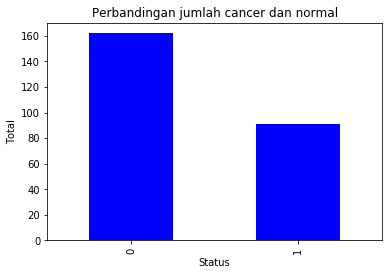

In [9]:
import matplotlib.pyplot as plt
data['status'].value_counts().plot(kind='bar', color="b")
plt.title("Perbandingan jumlah cancer dan normal")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

In [10]:
data.describe()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut15145,atribut15146,atribut15147,atribut15148,atribut15149,atribut15150,atribut15151,atribut15152,atribut15153,status
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,0.532450,0.462623,0.465859,0.421363,0.481133,0.489570,0.466263,0.512587,0.531018,0.447726,...,0.443944,0.430548,0.430548,0.430548,0.430548,0.430548,0.430548,0.430548,0.430548,0.359684
std,0.183136,0.196834,0.196418,0.212991,0.196406,0.185289,0.173548,0.214232,0.215837,0.188748,...,0.156482,0.155192,0.155192,0.155192,0.155192,0.155192,0.155192,0.155192,0.155192,0.480859
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.397850,0.329667,0.321841,0.255817,0.345240,0.354432,0.345240,0.342109,0.362316,0.307689,...,0.334049,0.330282,0.330282,0.330282,0.330282,0.330282,0.330282,0.330282,0.330282,0.000000
50%,0.537636,0.461537,0.459768,0.430235,0.476194,0.468359,0.464290,0.500000,0.536231,0.428571,...,0.451566,0.433102,0.433102,0.433102,0.433102,0.433102,0.433102,0.433102,0.433102,0.000000
75%,0.655912,0.593407,0.597701,0.569765,0.619047,0.620253,0.595238,0.684212,0.710146,0.582418,...,0.547010,0.541554,0.541554,0.541554,0.541554,0.541554,0.541554,0.541554,0.541554,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
X = data.drop(['status'],axis=1)
y = data['status']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=45)

In [13]:
def minmax_scaler(X_train_, X_test_):
    scaler = MinMaxScaler()
    X_train_ = scaler.fit_transform(X_train_)
    X_test_ = scaler.transform(X_test_)
    return X_train_,X_test_

In [14]:
X_train_, X_test_ = minmax_scaler(X_train,X_test)
X_train = pd.DataFrame(data=X_train_, columns=X_train.columns)
X_test = pd.DataFrame(data=X_test_, columns=X_test.columns)

In [15]:
# korelasi = data.corr().drop(['status'],axis=1).drop(['status'],axis=0)
# korelasi.columns

In [16]:
from sklearn.feature_selection import f_classif
f_score, f_p_value = f_classif(X,y)
print('F - score score   ', f_score)
print('F - score p-value ', f_p_value)

F - score score    [26.71619882 24.06436402 26.25364093 ...  0.09345362  0.09345362
  0.09345362]
F - score p-value  [4.81199461e-07 1.67641033e-06 5.97543827e-07 ... 7.60085045e-01
 7.60085045e-01 7.60085045e-01]


In [17]:
import random

In [18]:
def random_subset(s, n_features = 3, n_iter=10):
    listSubset = []
    for i in range(n_iter):
        listSubset.append(random.sample(list(s),n_features))
    return listSubset

In [19]:
def count_redundancy(cor):
    korr = []
    korr = cor.values
    np.fill_diagonal(korr,0)
    korr = np.concatenate(korr)
    korr = np.unique(korr)
    sum_kor = np.sum(korr)
    return sum_kor

In [20]:
def mrmr(X,y,n_features=3,n_iter=10):
    subset = random_subset(X.columns,n_features,n_iter)
    mrmr_list = []
    for i in subset:
        korelasi = X[i].corr()
        red = count_redundancy(korelasi)
        f_score, f_p_value = f_classif(X[i],y)
        rel = np.sum(f_score)
        mrmr_score = rel - ((1/len(subset))*red)
        mrmr_list.append((i,mrmr_score))
    return sorted(mrmr_list,key=lambda l:l[1],reverse=True)

In [78]:
taken_featuresTrain = mrmr(X_train,y_train,50,10)[0][0]
taken_featuresTrain

['atribut8074',
 'atribut8487',
 'atribut9959',
 'atribut11587',
 'atribut15083',
 'atribut9455',
 'atribut6897',
 'atribut1845',
 'atribut13995',
 'atribut11368',
 'atribut6778',
 'atribut12517',
 'atribut9525',
 'atribut3206',
 'atribut10944',
 'atribut254',
 'atribut9607',
 'atribut3634',
 'atribut3343',
 'atribut8799',
 'atribut733',
 'atribut10201',
 'atribut6476',
 'atribut2939',
 'atribut6600',
 'atribut5268',
 'atribut204',
 'atribut11008',
 'atribut5910',
 'atribut4883',
 'atribut922',
 'atribut5337',
 'atribut4881',
 'atribut2378',
 'atribut4665',
 'atribut10099',
 'atribut10254',
 'atribut4816',
 'atribut3224',
 'atribut6434',
 'atribut3334',
 'atribut1668',
 'atribut1924',
 'atribut9667',
 'atribut1108',
 'atribut5171',
 'atribut5968',
 'atribut13482',
 'atribut11651',
 'atribut4789']

In [79]:
X_train_mrmr = X_train[taken_featuresTrain].copy()

In [80]:
taken_featuresTest = mrmr(X_test,y_test,50,10)[0][0]
taken_featuresTest

['atribut9784',
 'atribut8295',
 'atribut12332',
 'atribut11828',
 'atribut11157',
 'atribut9399',
 'atribut10314',
 'atribut15075',
 'atribut10481',
 'atribut10985',
 'atribut7555',
 'atribut9858',
 'atribut7948',
 'atribut3694',
 'atribut12596',
 'atribut8087',
 'atribut7061',
 'atribut4700',
 'atribut9975',
 'atribut12799',
 'atribut7152',
 'atribut11277',
 'atribut6078',
 'atribut1536',
 'atribut12724',
 'atribut2667',
 'atribut3006',
 'atribut7950',
 'atribut2535',
 'atribut2317',
 'atribut6327',
 'atribut9377',
 'atribut5817',
 'atribut13029',
 'atribut8386',
 'atribut7625',
 'atribut10703',
 'atribut9180',
 'atribut12977',
 'atribut10623',
 'atribut3408',
 'atribut996',
 'atribut14285',
 'atribut4184',
 'atribut11788',
 'atribut2762',
 'atribut6136',
 'atribut5081',
 'atribut14103',
 'atribut11554']

In [81]:
X_test_mrmr = X_test[taken_featuresTest].copy()

In [82]:
model_rfg = RandomForestClassifier()

In [83]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'log2'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }

In [84]:
random_search = RandomizedSearchCV(estimator=model_rfg,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs = -1)

# Fit the random search model
random_search.fit(X_train_mrmr, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [85]:
print("Best Params : ",random_search.best_params_)
print()
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}

0.876 (+/-0.110) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.876 (+/-0.110) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.881 (+/-0.098) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.896 (+/-0.088) for {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}
0.876 (+/-0.098) for {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.876 (+/-0.098) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}
0.881 (+/-0.098) for {'n_estimators': 400, 'min_samples_split': 2, '

In [86]:
random_search.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'bootstrap': False}

In [87]:
grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['log2'],
               'min_samples_split': [5],
               'min_samples_leaf': [2],
               'bootstrap': [False]
                     }

In [88]:
grid_search = GridSearchCV(estimator=model_rfg,
                                   param_grid=grid_params,
                                   cv=3, 
                                   verbose=1, 
                                   n_jobs = -1)

grid_search.fit(X_train_mrmr, y_train)
print("Best Params : ",grid_search.best_params_)
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    6.5s finished


Best Params :  {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 600}

0.886 (+/-0.110) for {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
0.891 (+/-0.110) for {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 400}
0.896 (+/-0.088) for {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 600}
0.891 (+/-0.086) for {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 800}
0.896 (+/-0.112) for {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1000}


In [89]:
classifier = grid_search.best_estimator_

In [90]:
classifier.fit(X_train_mrmr, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
prediksi = classifier.predict(X_test_mrmr)
prediksi

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [92]:
pd.DataFrame({
    "status" : y_test,
    "status predicted" : prediksi
})

,status,status predicted
38,1,0
83,1,1
72,1,0
30,1,1
79,1,0
73,1,0
47,1,0
141,0,0
224,0,0
112,0,0


In [93]:
accuracy_score(y_test,prediksi)

0.6274509803921569

In [94]:
print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72        30
           1       0.57      0.38      0.46        21

    accuracy                           0.63        51
   macro avg       0.61      0.59      0.59        51
weighted avg       0.62      0.63      0.61        51



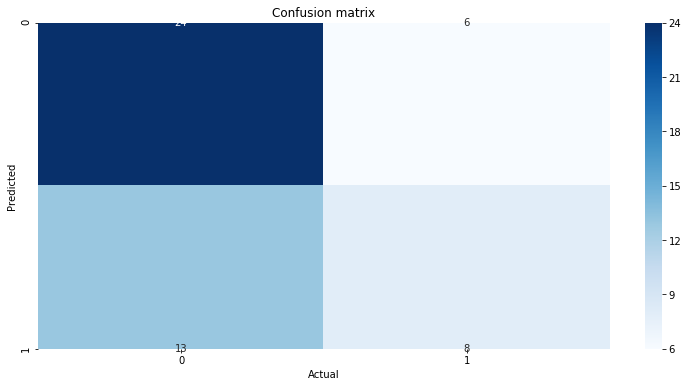

In [95]:
aux_df = data[['status']].drop_duplicates().sort_values('status')
conf_matrix = confusion_matrix(y_test, prediksi)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['status'].values, 
            yticklabels=aux_df['status'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [96]:
confusion_matrix(y_test,prediksi)

array([[24,  6],
       [13,  8]], dtype=int64)